In [2]:
import sys
print(sys.argv)

['ipykernel_launcher', '--ip=127.0.0.1', '--stdin=9058', '--control=9056', '--hb=9055', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"98f978ab-8103-4437-b2f6-08c5ef53f7e9"', '--shell=9057', '--transport="tcp"', '--iopub=9059', '--f=/tmp/tmp-56952nUhrl7thzp2I.json']


Populating the interactive namespace from numpy and matplotlib
test_data.csv  train_data.csv  train_labels.csv
psutil is not installed. Hardware metrics will not be collected.
https://app.neptune.ai/ikarpicka/ProjectML/e/PROJ-39
(3750, 10000) (1250, 10000) (3750, 1)
None
0         379.56225
1         291.43925
2       58915.03400
3       78590.38925
4       28942.63250
           ...     
9995      857.33875
9996      278.93200
9997     1100.85400
9998      851.98725
9999     1015.00150
Length: 10000, dtype: float64
      lower_boundary  upper_boundary  num_of_outliers_L  num_of_outliers_U
0        -733.125125      785.123875                 14                 14
1        -572.502375      593.254625                 11                 12
2     -117656.670500   118003.465500                 15                 14
3     -155914.012875   158447.544125                  9                  9
4      -57840.748250    57929.781750                 14                 17
...              ...        

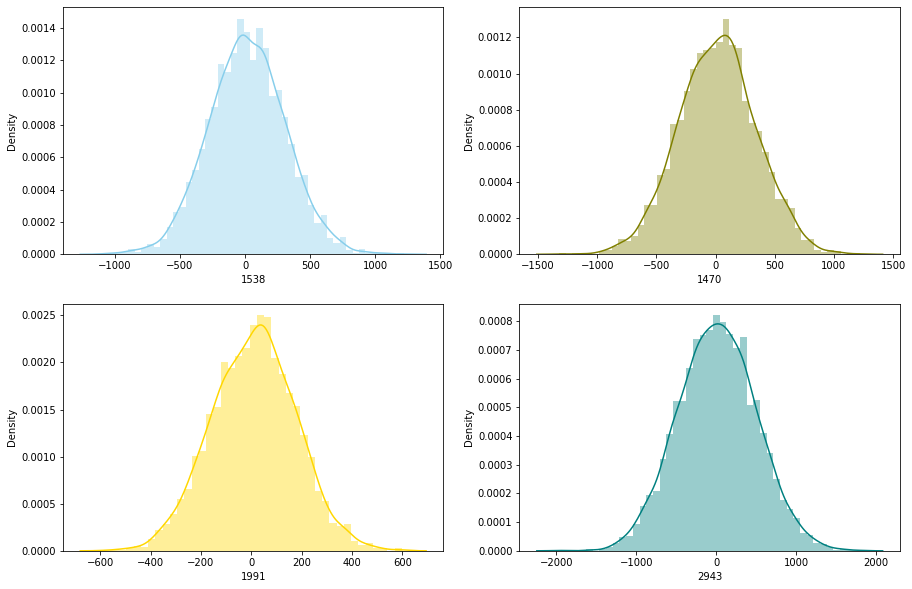

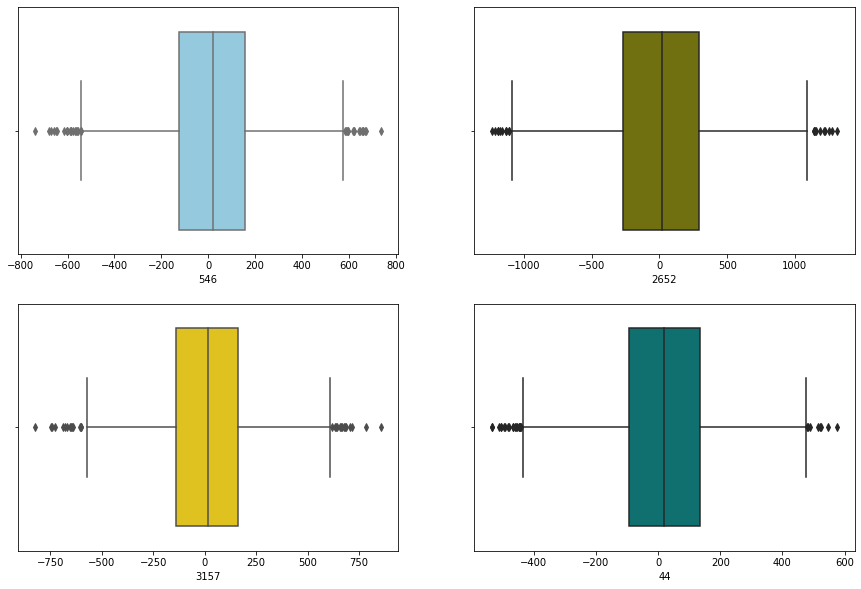

For the variable 2711 no grounds for rejecting the null hypothesis were found. The variable come from the normal distribution. P-value: 0.5866618843917549
None
0         362.13725
1         288.24375
2       58805.60225
3       77337.97700
4       28344.47775
           ...     
9995      861.04500
9996      285.37650
9997     1088.02525
9998      840.36225
9999     1064.52525
Length: 10000, dtype: float64
      lower_boundary  upper_boundary  num_of_outliers_L  num_of_outliers_U
0        -720.111875      728.437125                  9                  7
1        -549.095125      603.879875                  4                  2
2     -115718.768125   119503.640875                  9                  1
3     -157066.049500   152285.858500                  2                  8
4      -56267.132625    57110.778375                 10                  2
...              ...             ...                ...                ...
9995    -1687.030500     1757.149500                  4          

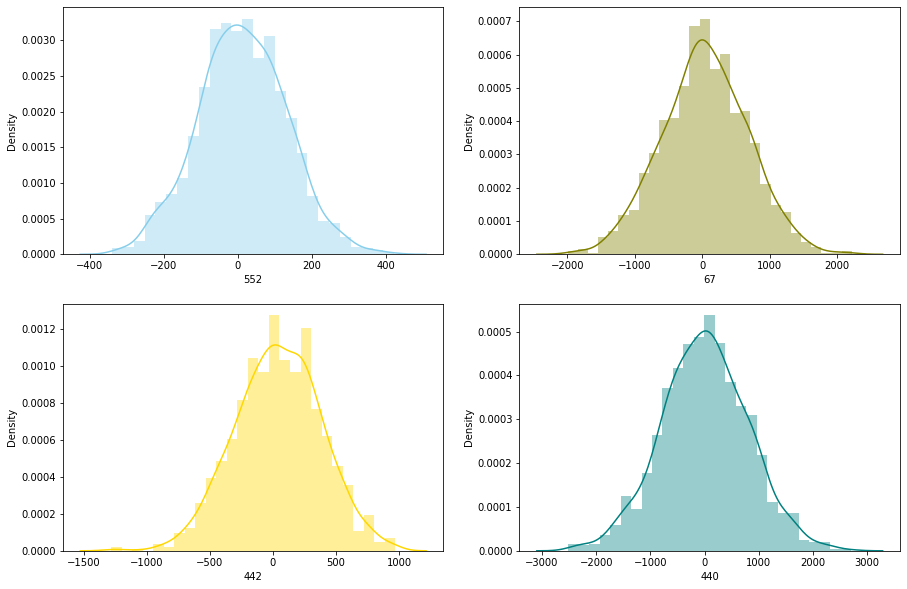

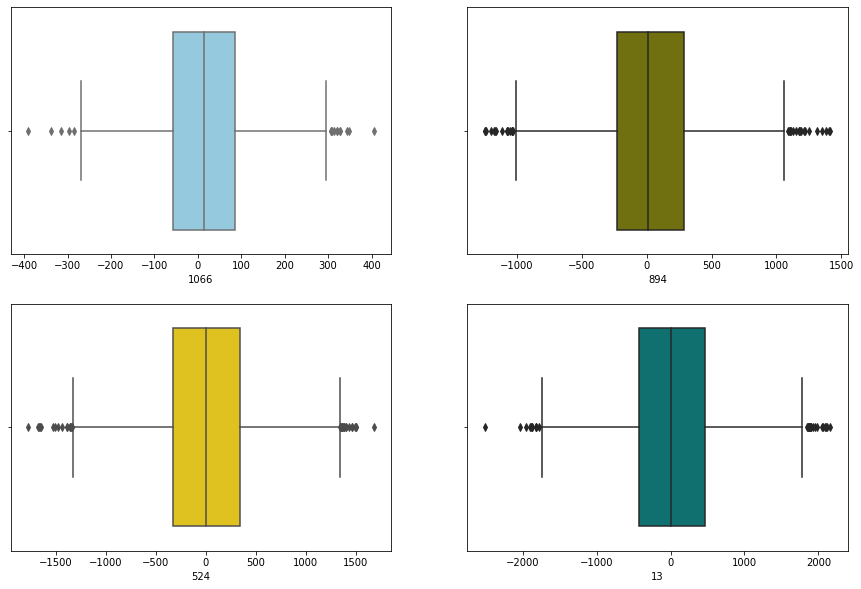

For the variable 820 no grounds for rejecting the null hypothesis were found. The variable come from the normal distribution. P-value: 0.4878877920083714
Original shape: (2812, 10000)
Reduced shape: (2812, 2)
Shape componets PCA: (2, 10000)
Componets PCA: 
[[ 2.21861449e-04  9.09264143e-04  1.31762137e-02 ... -5.22387624e-03
  -6.40206323e-03  8.73656942e-03]
 [ 1.06023740e-02  4.87466960e-03 -6.70189677e-05 ...  8.96307524e-03
  -3.59670271e-03  1.75724611e-03]]
/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


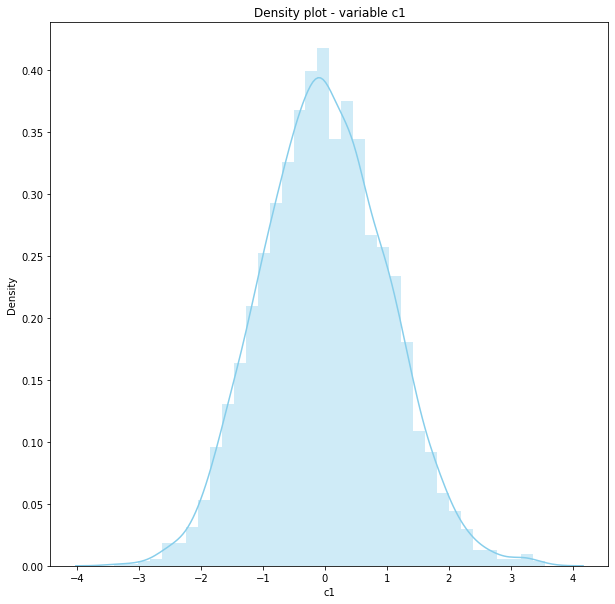

/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


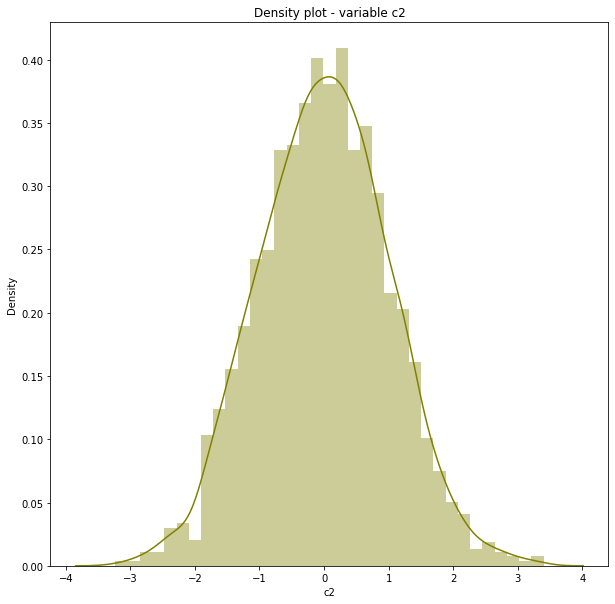

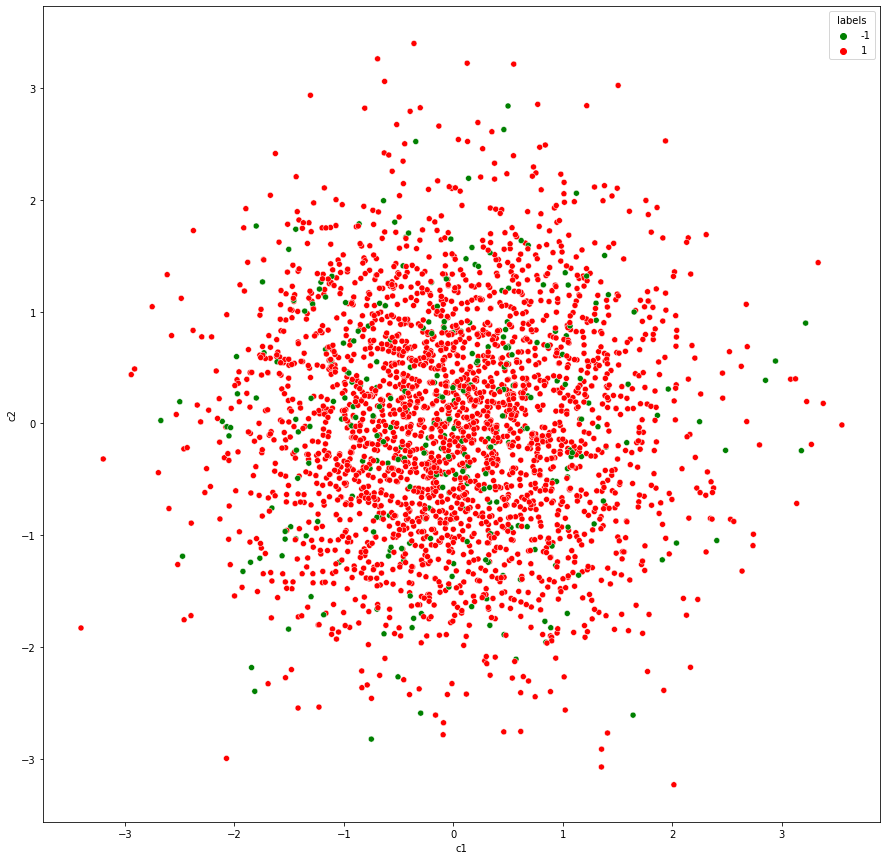

In [3]:
%run eda.ipynb

In [4]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
import mglearn
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#pip install KMeans

Populating the interactive namespace from numpy and matplotlib
/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['axes', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [5]:
print('mean : %s' % X_train.mean(axis=0))
print('std : %s' % X_train.std(axis=0))

mean : 0         25.600574
1          8.097120
2        358.584127
3       1071.208947
4        -63.522442
           ...     
9995     -10.060557
9996      10.323029
9997      13.686166
9998      -3.735844
9999      28.803662
Length: 10000, dtype: float64
std : 0         284.983487
1         214.654427
2       43422.777912
3       56869.639747
4       22164.488140
            ...     
9995      651.881685
9996      204.069162
9997      789.608153
9998      628.353659
9999      768.785192
Length: 10000, dtype: float64


In [6]:
print('mean : %s' % X_train_standarized.mean(axis=0))
print('std : %s' % X_train_standarized.std(axis=0))

mean : [ 1.13707052e-17  1.32658228e-17  1.64243520e-17 ...  7.89632308e-19
 -1.51609403e-17  2.52682338e-18]
std : [1. 1. 1. ... 1. 1. 1.]


/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

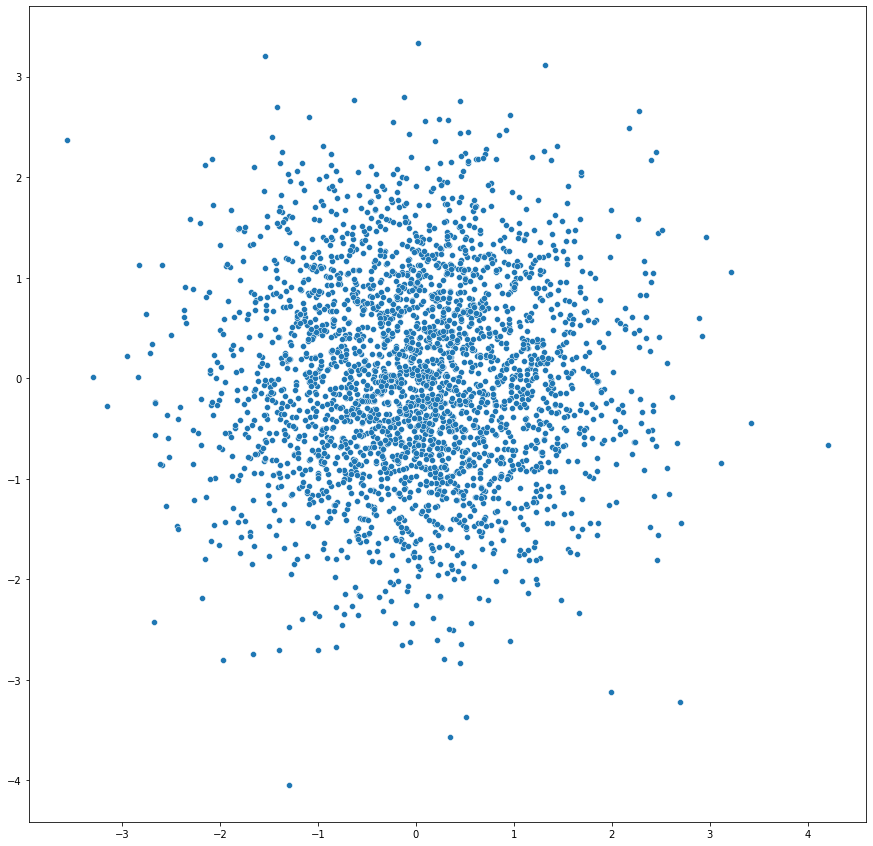

In [7]:
plt.figure(figsize=(15, 15))
sns.scatterplot(X_train_standarized[:, 0], X_train_standarized[:,1])

In [8]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_standarized, y_train)
print('Result in a standardized - test set using 1 nearest neighbor: {:.2f}'.format(knn.score(X_test, y_test)))

/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
Result in a standardized - test set using 1 nearest neighbor: 0.89


/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-

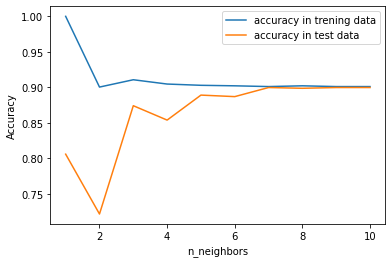

In [9]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train_standarized, y_train)
    training_accuracy.append(clf.score(X_train_standarized, y_train))

    test_accuracy.append(clf.score(X_test_standarized, y_test))

plt.plot(neighbors_settings, training_accuracy, label="accuracy in trening data")
plt.plot(neighbors_settings, test_accuracy, label="accuracy in test data")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [10]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train_standarized)
print('Belonging to a cluster:\n{}'.format(kmeans.labels_))

Belonging to a cluster:
[1 0 0 ... 0 0 0]


In [11]:
kmeans_pca = KMeans(n_clusters=2)
kmeans_pca.fit(X_train_pca)
print('Belonging to a cluster:\n{}'.format(kmeans_pca.labels_))

Belonging to a cluster:
[1 1 1 ... 0 0 1]


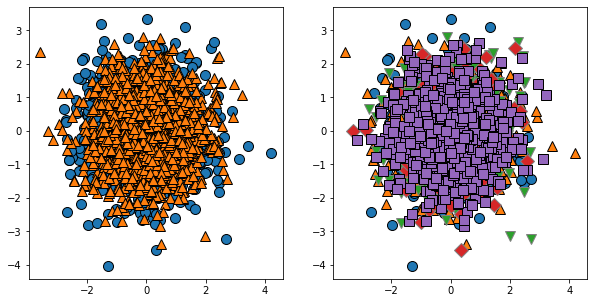

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train_standarized)
assignments = kmeans.labels_
mglearn.discrete_scatter(X_train_standarized[:, 0], X_train_standarized[:,1], assignments, ax=axes[0])

kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train_standarized)
assignments = kmeans.labels_
mglearn.discrete_scatter(X_train_standarized[:, 0], X_train_standarized[:,1], assignments, ax=axes[1]);

In [13]:
logreg = LogisticRegression(max_iter=100)

scores = cross_val_score(logreg, X_train_standarized, y_train)
print("Cross-validation result: {}".format(scores))

/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1

In [14]:
kfold = KFold(n_splits=5)

scores = cross_val_score(logreg, X_train_standarized, y_train, cv = kfold)
print("Cross-validation result: {}".format(scores))

/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1

In [15]:
print("Size od train set: {}.   Size of test set: {}".format(
      X_train_standarized.shape[0], X_test_standarized.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:

        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train_standarized, y_train)
        score = svm.score(X_test_standarized, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("The best results: {:.2f}".format(best_score))
print("The best parameters: {}".format(best_parameters))

Size od train set: 2812.   Size of test set: 938
/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True)

grid_search.fit(X_train_standarized, y_train)

print("Test set results: {:.2f}".format(grid_search.score(X_test_standarized, y_test)))
print("The best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation results: {:.2f}".format(grid_search.best_score_))
print("The best estimator:\n{}".format(grid_search.best_estimator_))

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
pd.set_option('display.max_columns', None)
display(results.T)

In [ ]:
scores = np.array(results.mean_test_score).reshape(6, 6)

mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")